<a href="https://colab.research.google.com/github/abhy-kumar/churn-analysis/blob/main/churn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset
df = pd.read_csv('/content/Telco_customer_churn.csv')

# Display the first few rows
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

<ipython-input-11-b3a74ee6fa46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


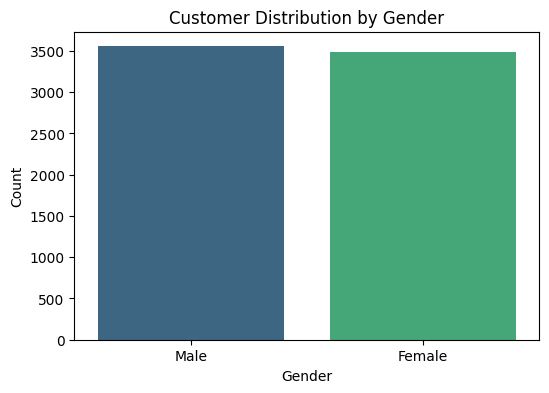

<ipython-input-11-b3a74ee6fa46>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=senior_counts.index, y=senior_counts.values, palette='magma')


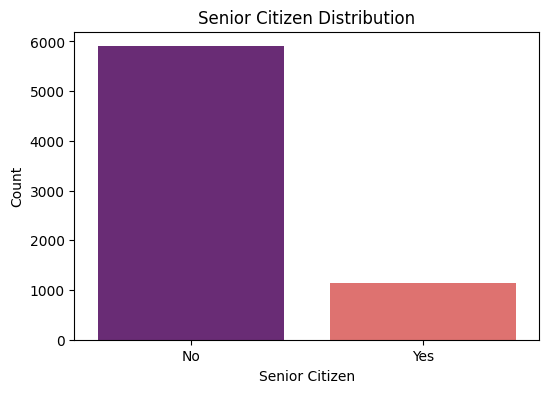

In [11]:
# Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Customer Distribution by Gender')
plt.ylabel('Count')
plt.show()

# Senior Citizen Distribution
senior_counts = df['Senior Citizen'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=senior_counts.index, y=senior_counts.values, palette='magma')
plt.title('Senior Citizen Distribution')
plt.ylabel('Count')
plt.show()

<ipython-input-12-cfee908d1755>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paperless_counts.index, y=paperless_counts.values, palette='Accent')


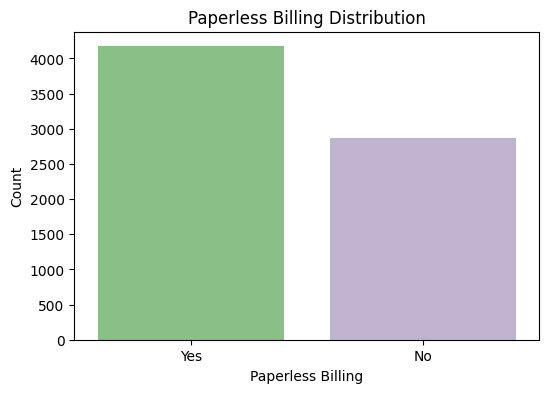

<ipython-input-12-cfee908d1755>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')


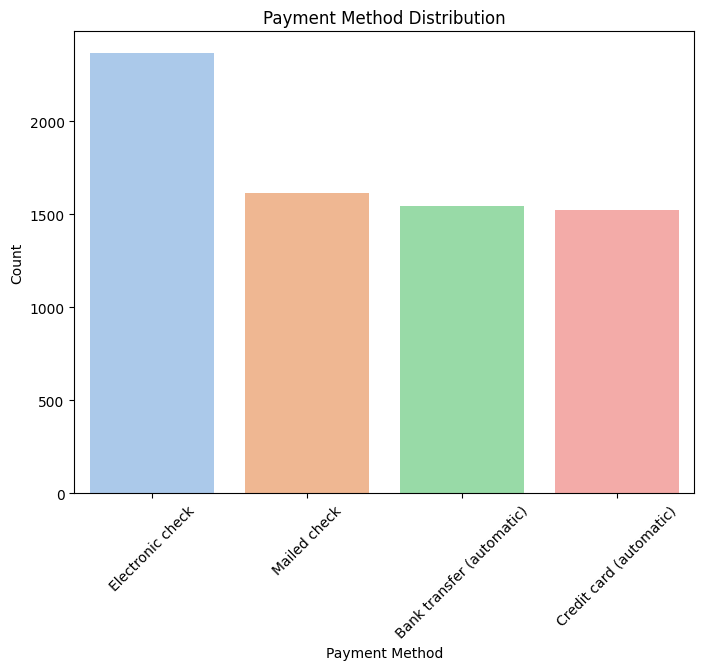

In [12]:
# Paperless Billing
paperless_counts = df['Paperless Billing'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=paperless_counts.index, y=paperless_counts.values, palette='Accent')
plt.title('Paperless Billing Distribution')
plt.ylabel('Count')
plt.show()

# Payment Method
payment_counts = df['Payment Method'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.title('Payment Method Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Overall Churn Rate
churn_rate = df['Churn Label'].value_counts(normalize=True) * 100
print("Overall Churn Rate:\n", churn_rate)

# Churn Rate by Gender
churn_gender = df.groupby('Gender')['Churn Label'].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Gender:\n", churn_gender)

# Churn Rate by Senior Citizen Status
churn_senior = df.groupby('Senior Citizen')['Churn Label'].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Senior Citizen Status:\n", churn_senior)

Overall Churn Rate:
 Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64
Churn Rate by Gender:
 Churn Label         No        Yes
Gender                           
Female       73.079128  26.920872
Male         73.839662  26.160338
Churn Rate by Senior Citizen Status:
 Churn Label            No        Yes
Senior Citizen                      
No              76.393832  23.606168
Yes             58.318739  41.681261


<ipython-input-14-f2aba519fc73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_reasons.index, y=churn_reasons.values, palette='Set3')


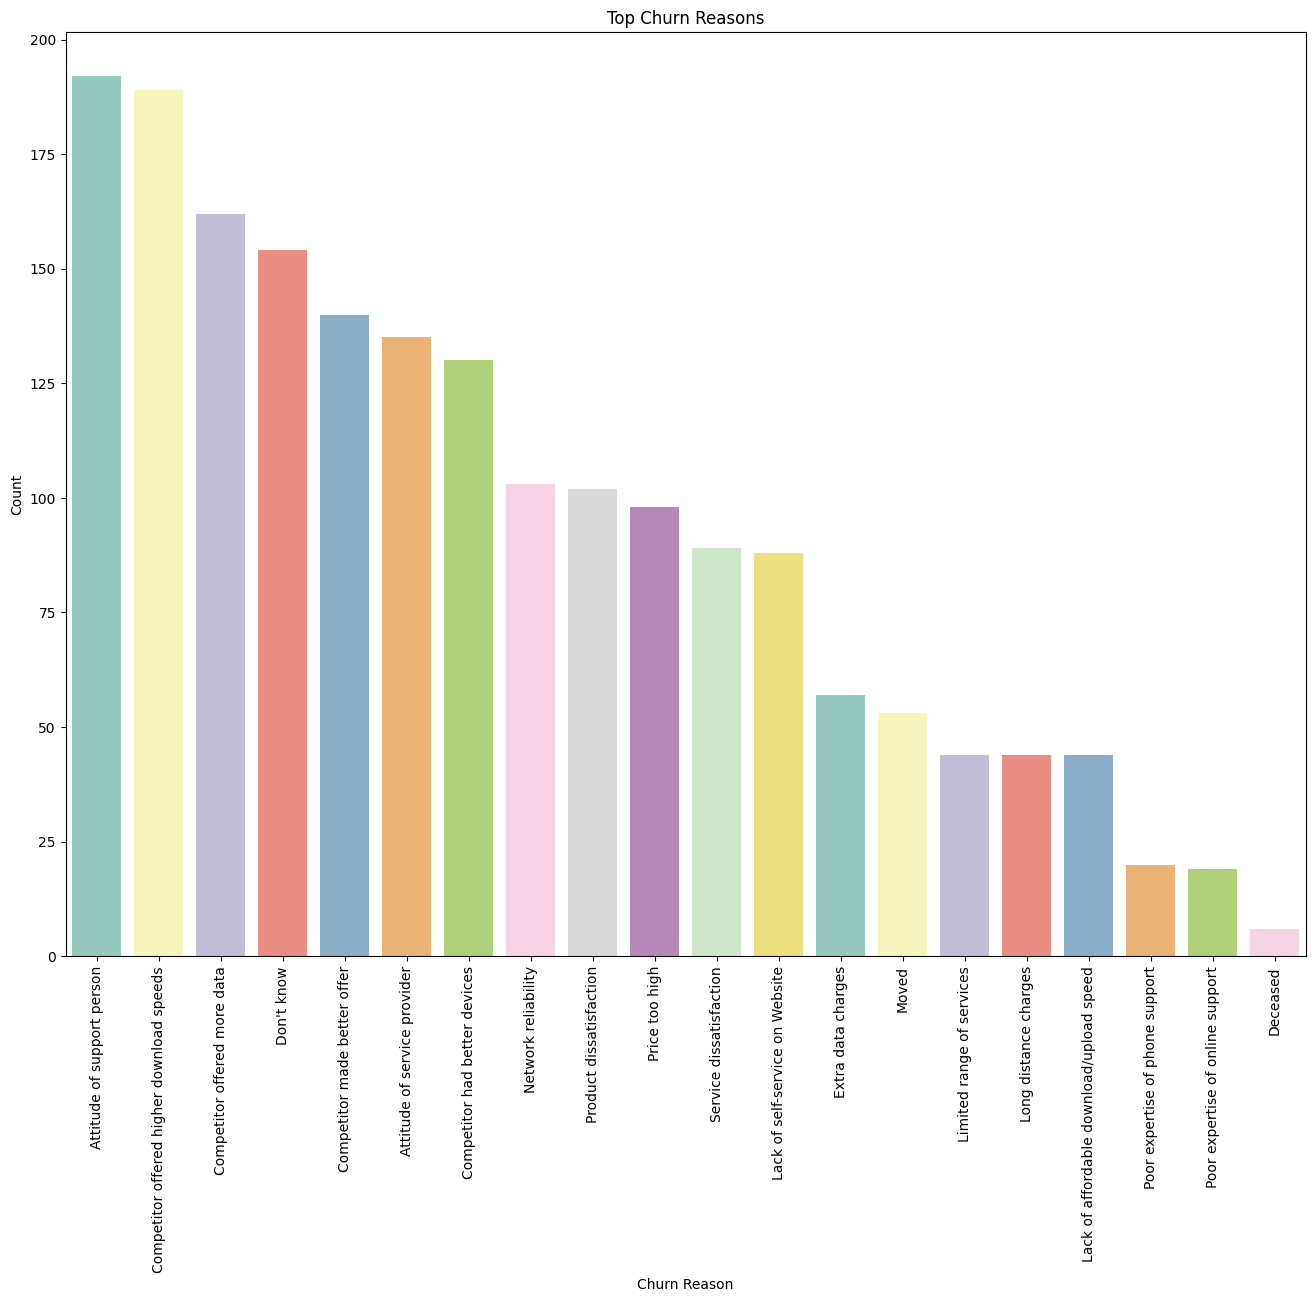

In [14]:
# Top Churn Reasons
churn_reasons = df['Churn Reason'].value_counts()
plt.figure(figsize=(16,12))
sns.barplot(x=churn_reasons.index, y=churn_reasons.values, palette='Set3')
plt.title('Top Churn Reasons')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Churn Rate by Partner
churn_partner = df.groupby('Partner')['Churn Label'].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Partner:\n", churn_partner)

# Churn Rate by Dependents
churn_dependents = df.groupby('Dependents')['Churn Label'].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Dependents:\n", churn_dependents)

Churn Rate by Partner:
 Churn Label         No        Yes
Partner                          
No           67.042021  32.957979
Yes          80.335097  19.664903
Churn Rate by Dependents:
 Churn Label         No        Yes
Dependents                       
No           67.448301  32.551699
Yes          93.484942   6.515058


Churn Rate by Internet Service Type:
 Churn Label              No        Yes
Internet Service                      
DSL               81.040892  18.959108
Fiber optic       58.107235  41.892765
No                92.595020   7.404980


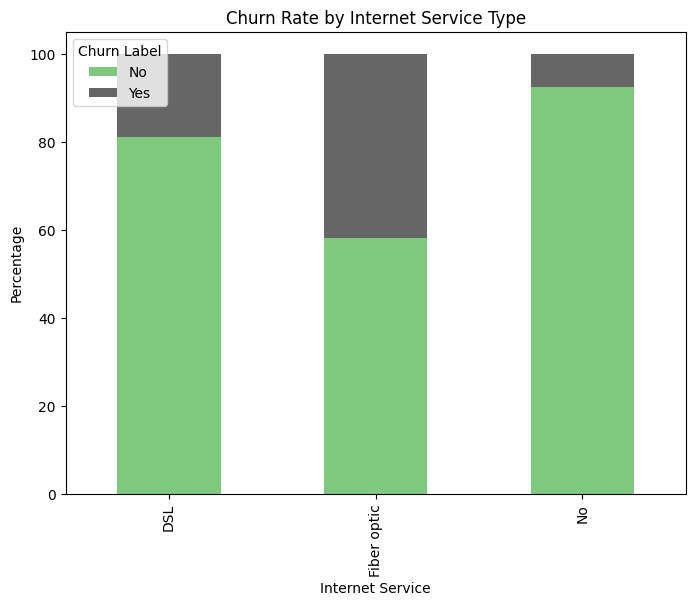

In [16]:
# Example: Internet Service Types
churn_internet = df.groupby('Internet Service')['Churn Label'].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Internet Service Type:\n", churn_internet)

# Visualization
churn_internet.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Accent')
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Percentage')
plt.show()